In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d1a6a32db9d5723999247010d77f28b5469098a874471842b9f989a6d419dca0
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=53a797c427ff8a6ca6ca026aa7255a16c2f6cbeab5cf0a7b5a4b30cf09e3b03d
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
metadata = pd.read_csv('interesting_metadata_for_oligo_vs_normal.csv')
metadata = metadata[["Unnamed: 0", "tumor"]]
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,tumor
GSM2899558,normal
GSM2899559,normal
GSM2899560,normal
GSM2899561,normal
GSM2899562,normal
...,...
GSM97949,oligodendroglioma
GSM97956,oligodendroglioma
GSM97962,oligodendroglioma
GSM97964,oligodendroglioma


In [ ]:
metadata["tumor"].value_counts()

oligodendroglioma    117
normal                51
Name: tumor, dtype: int64

In [ ]:
df = pd.read_csv('interesting_genes_expressions_for_oligo_vs_normal.csv')
df = df.drop(columns={'Unnamed: 0'})
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[168])
df_transposed.drop(index=df_transposed.index[168], 
        axis=0, 
        inplace=True)
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df

,tumor,CREG2,SLC39A12,RBFOX1,DNAJA4,OLFM3,OLFM3,MYT1L,PALM2AKAP2,ZNF385B,...,PDE1A,ARHGEF7,KRT222,GABRA1,HTR2A,NaN,NEFH,PHF24,PPP1R16B,FERMT1
GSM2899558,normal,9.851671,8.362494,10.671862,7.018926,8.996324,8.427248,7.591996,7.780938,7.14333,...,7.928691,9.883658,9.042614,10.500672,9.641306,8.402532,9.567037,9.354607,10.082158,7.101034
GSM2899559,normal,10.004868,8.514118,10.774532,6.265091,9.206954,8.561028,8.66956,7.695347,6.765222,...,8.862359,9.701488,8.098819,10.542419,9.495524,7.767477,8.744901,9.297281,10.151204,7.223274
GSM2899560,normal,10.082971,8.117597,11.024331,5.668174,9.102236,8.218835,9.025794,7.571697,7.051955,...,8.086636,9.364249,8.018005,10.657301,9.144482,7.002602,9.765754,8.893805,9.825098,6.898798
GSM2899561,normal,9.613305,8.337773,10.418179,5.534756,8.519577,8.191908,7.66378,7.490396,6.907394,...,8.103343,9.176542,8.369438,9.848985,9.500753,8.079844,9.138567,8.461969,9.779112,7.256169
GSM2899562,normal,8.457482,8.695391,11.186727,7.716112,8.684439,8.094604,8.846499,8.851955,7.658566,...,8.733817,10.535769,7.323901,11.593391,9.951097,8.282525,9.287942,9.291152,10.651021,7.088356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM97949,oligodendroglioma,9.027686,9.300857,11.115386,6.975324,9.424444,8.94623,9.083982,7.286302,7.863392,...,8.438254,9.75556,8.342702,11.519143,9.686889,8.828929,9.811604,9.091557,10.517268,7.769258
GSM97956,oligodendroglioma,6.994399,6.047246,8.573914,4.726631,6.26679,5.337717,6.648777,5.483084,5.225153,...,6.362447,8.035177,5.226744,8.096293,8.161451,11.185226,7.276039,6.549953,8.619844,11.390267
GSM97962,oligodendroglioma,7.67684,6.061922,8.23299,4.665596,5.98233,5.211924,5.478844,5.092967,4.662381,...,6.592222,8.102213,5.208956,7.827442,7.164248,11.299513,7.164679,6.751209,8.282735,11.338484
GSM97964,oligodendroglioma,6.142205,5.946772,8.656033,5.024079,5.851491,5.35864,7.25225,5.139143,5.072622,...,5.987614,7.60209,5.295106,8.20263,6.381401,10.761082,7.36401,6.643271,8.456142,11.411


In [ ]:
df.isnull().sum()

tumor       0
CREG2       0
SLC39A12    0
RBFOX1      0
DNAJA4      0
           ..
NaN         0
NEFH        0
PHF24       0
PPP1R16B    0
FERMT1      0
Length: 372, dtype: int64

In [ ]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [ ]:
# Encoding categorical values

df['tumor'] = df['tumor'].replace({'normal':0,'oligodendroglioma':1,'Other':-1}).astype(np.uint8)

In [ ]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',51/(51+117))
print('Null Accuracy: ',117/(117+51))

Inverse of Null Accuracy:  0.30357142857142855
Null Accuracy:  0.6964285714285714


In [ ]:
df.reset_index(inplace=True)
df

,index,tumor,CREG2,SLC39A12,RBFOX1,DNAJA4,OLFM3,OLFM3,MYT1L,PALM2AKAP2,...,PDE1A,ARHGEF7,KRT222,GABRA1,HTR2A,NaN,NEFH,PHF24,PPP1R16B,FERMT1
0,GSM2899558,0,9.851671,8.362494,10.671862,7.018926,8.996324,8.427248,7.591996,7.780938,...,7.928691,9.883658,9.042614,10.500672,9.641306,8.402532,9.567037,9.354607,10.082158,7.101034
1,GSM2899559,0,10.004868,8.514118,10.774532,6.265091,9.206954,8.561028,8.66956,7.695347,...,8.862359,9.701488,8.098819,10.542419,9.495524,7.767477,8.744901,9.297281,10.151204,7.223274
2,GSM2899560,0,10.082971,8.117597,11.024331,5.668174,9.102236,8.218835,9.025794,7.571697,...,8.086636,9.364249,8.018005,10.657301,9.144482,7.002602,9.765754,8.893805,9.825098,6.898798
3,GSM2899561,0,9.613305,8.337773,10.418179,5.534756,8.519577,8.191908,7.66378,7.490396,...,8.103343,9.176542,8.369438,9.848985,9.500753,8.079844,9.138567,8.461969,9.779112,7.256169
4,GSM2899562,0,8.457482,8.695391,11.186727,7.716112,8.684439,8.094604,8.846499,8.851955,...,8.733817,10.535769,7.323901,11.593391,9.951097,8.282525,9.287942,9.291152,10.651021,7.088356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,GSM97949,1,9.027686,9.300857,11.115386,6.975324,9.424444,8.94623,9.083982,7.286302,...,8.438254,9.75556,8.342702,11.519143,9.686889,8.828929,9.811604,9.091557,10.517268,7.769258
164,GSM97956,1,6.994399,6.047246,8.573914,4.726631,6.26679,5.337717,6.648777,5.483084,...,6.362447,8.035177,5.226744,8.096293,8.161451,11.185226,7.276039,6.549953,8.619844,11.390267
165,GSM97962,1,7.67684,6.061922,8.23299,4.665596,5.98233,5.211924,5.478844,5.092967,...,6.592222,8.102213,5.208956,7.827442,7.164248,11.299513,7.164679,6.751209,8.282735,11.338484
166,GSM97964,1,6.142205,5.946772,8.656033,5.024079,5.851491,5.35864,7.25225,5.139143,...,5.987614,7.60209,5.295106,8.20263,6.381401,10.761082,7.36401,6.643271,8.456142,11.411


In [ ]:
X = df.drop(['tumor', 'index'], axis=1)
y = df['tumor']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier())])
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier())])
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier())])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

rf_cv = cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1')
knn_cv = cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1')
dt_cv = cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1')
nn_cv = cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('KNN mean :',cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Decision Tree mean :',cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Neural Network mean :',cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9657142857142856
SVM mean : 0.9657142857142856
Logistic Regression mean : 0.9800000000000001
KNN mean : 0.9657142857142856
Decision Tree mean : 0.9746031746031747
Neural Network mean : 0.9457142857142857


In [ ]:
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

from sklearn.metrics import f1_score

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

In [ ]:
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)
print('KNN mean :', knn_f1)
print('DT mean :', dt_f1)
print('NN mean :', nn_f1)

Mean f1 scores:
RF mean : 0.9299363057324841
SVM mean : 0.9150326797385621
LR mean : 0.948051948051948
KNN mean : 0.9150326797385621
DT mean : 0.9150326797385621
NN mean : 0.9150326797385621


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

print("Random Forest. ")
print(classification_report(y_test,rf_pred))

print('Accuracy Score: ', accuracy_score(y_test,rf_pred))

print("SVM. ")
print(classification_report(y_test,svm_pred))

print('Accuracy Score: ', accuracy_score(y_test,svm_pred))

print("Logistic Regression. ")
print(classification_report(y_test,logreg_pred))

print('Accuracy Score: ', accuracy_score(y_test,logreg_pred))

print("KNN. ")
print(classification_report(y_test,knn_pred))

print('Accuracy Score: ', accuracy_score(y_test,knn_pred))

Random Forest. 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.96      0.90      0.93        81

    accuracy                           0.91       118
   macro avg       0.89      0.91      0.90       118
weighted avg       0.91      0.91      0.91       118

Accuracy Score:  0.9067796610169492
SVM. 
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        37
           1       0.97      0.86      0.92        81

    accuracy                           0.89       118
   macro avg       0.87      0.91      0.88       118
weighted avg       0.91      0.89      0.89       118

Accuracy Score:  0.8898305084745762
Logistic Regression. 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.90      0.95        81

    accuracy                           0.93       118
   macro avg

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]})

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9600


Parameters that give the best results : 

 {'bootstrap': True, 'max_features': 2, 'n_estimators': 64}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_features=2, n_estimators=64)


In [ ]:
# Let's use those params now

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(max_features=2, n_estimators=64))])

rf_pipeline.fit(X_train,y_train)

rf_tuned_pred = rf_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_tuned_pred))
print('F1 Score: ',f1_score(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        37
           1       0.96      0.88      0.92        81

    accuracy                           0.89       118
   macro avg       0.87      0.90      0.88       118
weighted avg       0.90      0.89      0.89       118

Accuracy Score:  0.8898305084745762
F1 Score:  0.9161290322580644


In [ ]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9800


Parameters that give the best results : 

 {'C': 0.1, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.1)


In [ ]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1))])

logreg_pipeline.fit(X_train,y_train)

logreg.fit(X_train,y_train)

logreg_tuned_pred = logreg_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.97      0.90      0.94        81

    accuracy                           0.92       118
   macro avg       0.89      0.92      0.91       118
weighted avg       0.92      0.92      0.92       118

Accuracy Score:  0.9152542372881356
F1 Score:  0.935897435897436


In [ ]:
# defining parameter range 
# svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf', 'linear', 'polynomial', 'sigmoid']} 

svm_param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

svm = SVC(random_state=42)

# grid = GridSearchCV(svm,svm_param_grid)

grid = GridSearchCV(estimator = svm,  
                           param_grid = svm_param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

AttributeError: ignored

In [ ]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=1, kernel='linear', random_state=42))])

svm_pipeline.fit(X_train,y_train)

svm_tuned_pred = svm_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.90      0.95        81

    accuracy                           0.93       118
   macro avg       0.91      0.95      0.93       118
weighted avg       0.94      0.93      0.93       118

Accuracy Score:  0.9322033898305084
F1 Score:  0.948051948051948


In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'n_neighbors': 1}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=1))])

knn_pipeline.fit(X_train,y_train)

knn_tuned_pred = knn_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,knn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,knn_tuned_pred))
print('F1 Score: ',f1_score(y_test,knn_tuned_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.97      0.91      0.94        81

    accuracy                           0.92       118
   macro avg       0.90      0.93      0.91       118
weighted avg       0.93      0.92      0.92       118

Accuracy Score:  0.923728813559322
F1 Score:  0.9426751592356688


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': range(1,10), 
          'min_samples_leaf': range(1,5)}

grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 63504 candidates, totalling 635040 fits


KeyboardInterrupt: ignored

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9600


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=1, random_state=42)


In [ ]:
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(max_depth=1, random_state=42))])

dt_pipeline.fit(X_train,y_train)

dt_tuned_pred = dt_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,dt_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,dt_tuned_pred))
print('F1 Score: ',f1_score(y_test,dt_tuned_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.97      0.94      0.96        81

    accuracy                           0.94       118
   macro avg       0.92      0.94      0.93       118
weighted avg       0.94      0.94      0.94       118

Accuracy Score:  0.940677966101695
F1 Score:  0.9559748427672956


In [ ]:
mlp = MLPClassifier(random_state=42)

params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

grid = GridSearchCV(mlp, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 4950 candidates, totalling 49500 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'alpha': 0.01, 'hidden_layer_sizes': 11, 'max_iter': 1000, 'random_state': 1, 'solver': 'lbfgs'}


Estimator that was chosen by the search : 

 MLPClassifier(alpha=0.01, hidden_layer_sizes=11, max_iter=1000, random_state=1,
              solver='lbfgs')


In [ ]:
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier(alpha=0.01, hidden_layer_sizes=11, max_iter=1000, random_state=1,
              solver='lbfgs'))])

nn_pipeline.fit(X_train,y_train)

nn_tuned_pred = nn_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,nn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,nn_tuned_pred))
print('F1 Score: ',f1_score(y_test,nn_tuned_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.99      0.89      0.94        81

    accuracy                           0.92       118
   macro avg       0.89      0.93      0.91       118
weighted avg       0.93      0.92      0.92       118

Accuracy Score:  0.9152542372881356
F1 Score:  0.935064935064935


In [ ]:
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

from sklearn.metrics import f1_score

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

In [ ]:
# Make dataframes to plot

from sklearn.metrics import recall_score, precision_score, roc_auc_score

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)], 
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)], 
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

knn_df = pd.DataFrame(data=[f1_score(y_test,knn_tuned_pred),accuracy_score(y_test, knn_tuned_pred), recall_score(y_test, knn_tuned_pred),
                   precision_score(y_test, knn_tuned_pred), roc_auc_score(y_test, knn_tuned_pred)], 
             columns=['K-Nearest-Neighbors Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

dt_df = pd.DataFrame(data=[f1_score(y_test,dt_tuned_pred),accuracy_score(y_test, dt_tuned_pred), recall_score(y_test, dt_tuned_pred),
                   precision_score(y_test, dt_tuned_pred), roc_auc_score(y_test, dt_tuned_pred)], 
             columns=['Decision Tree Classifier Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

nn_df = pd.DataFrame(data=[f1_score(y_test,nn_tuned_pred),accuracy_score(y_test, nn_tuned_pred), recall_score(y_test, nn_tuned_pred),
                   precision_score(y_test, nn_tuned_pred), roc_auc_score(y_test, nn_tuned_pred)], 
             columns=['Multilayer Perceptron Neural Network Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

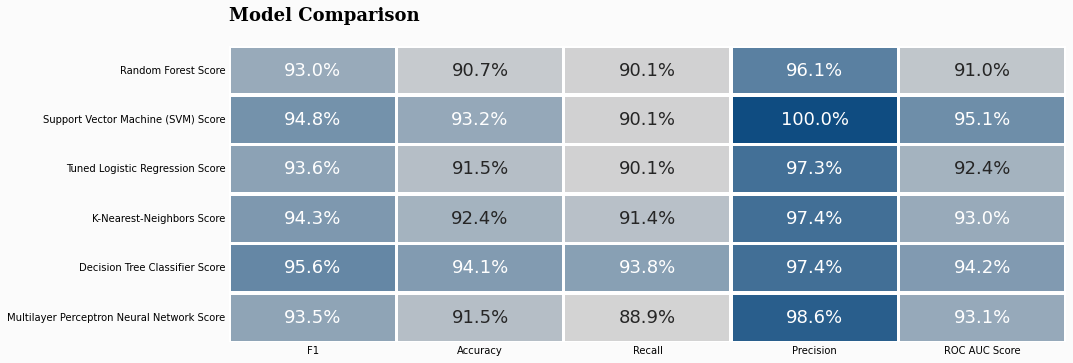

In [ ]:
df_models = round(pd.concat([rf_df,svm_df,lr_df,knn_df, dt_df, nn_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(15,30)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0.80,vmax=1, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":18})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

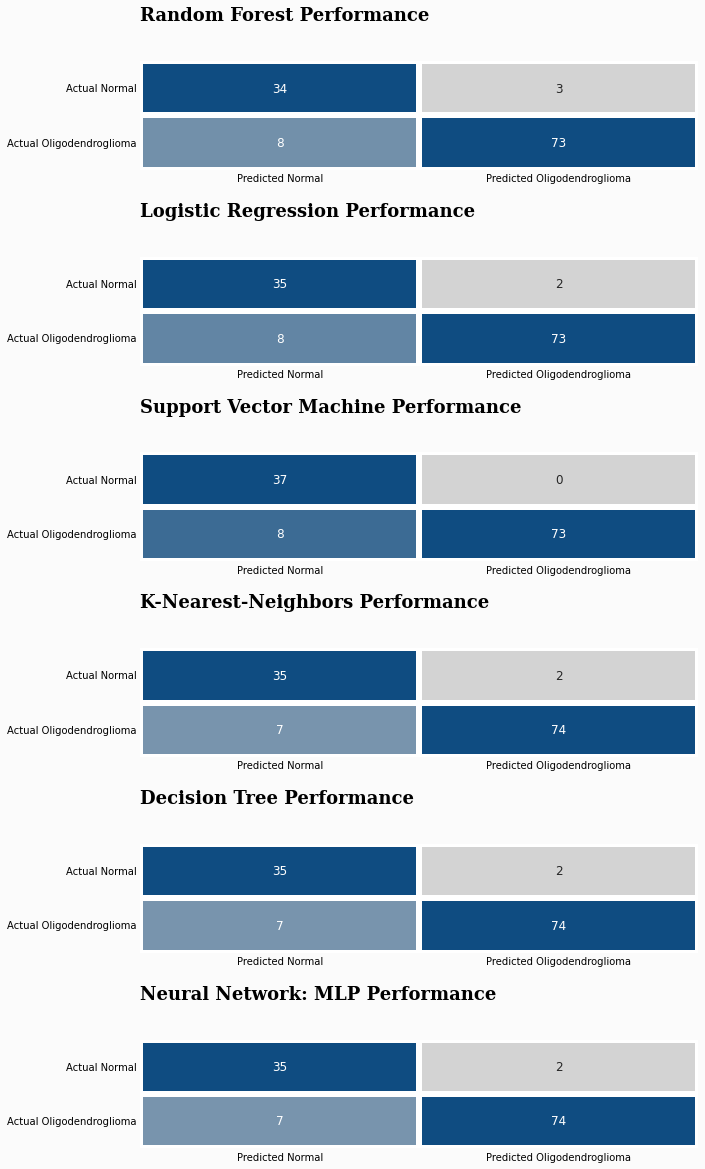

In [ ]:
# Plotting our results

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,20)) # create figure
gs = fig.add_gridspec(6, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[3, :])
ax4 = fig.add_subplot(gs[4, :])
ax5 = fig.add_subplot(gs[5, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

sns.heatmap(knn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax3,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

sns.heatmap(dt_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax4,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

sns.heatmap(nn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax5,
            yticklabels=['Actual Normal','Actual Oligodendroglioma'],xticklabels=['Predicted Normal','Predicted Oligodendroglioma'],annot_kws={"fontsize":12})

ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color) 
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax3.set_facecolor(background_color)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.set_facecolor(background_color)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax5.set_facecolor(background_color)

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax3.text(0,-0.75,'K-Nearest-Neighbors Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax4.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax5.text(0,-0.75,'Neural Network: MLP Performance',fontsize=18,fontweight='bold',fontfamily='serif')

plt.show()

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)

fi = rf_feat_importance(rf_pipeline['RF'], X)
fi[:].style.background_gradient(cmap=colormap)

,Feature,Importance
561,RAB3C,0.044183
33,PPFIA2,0.031423
717,KCTD4,0.029306
360,ERC2,0.029070
303,HTR2A,0.026428
705,CELF4,0.024986
233,HTR2A,0.024684
644,LRRC7,0.023663
524,GABRB3,0.018544
107,LPL,0.018179


In [ ]:
fi[fi['Importance'] >= 0.02].to_csv('random-forest-genes.csv')

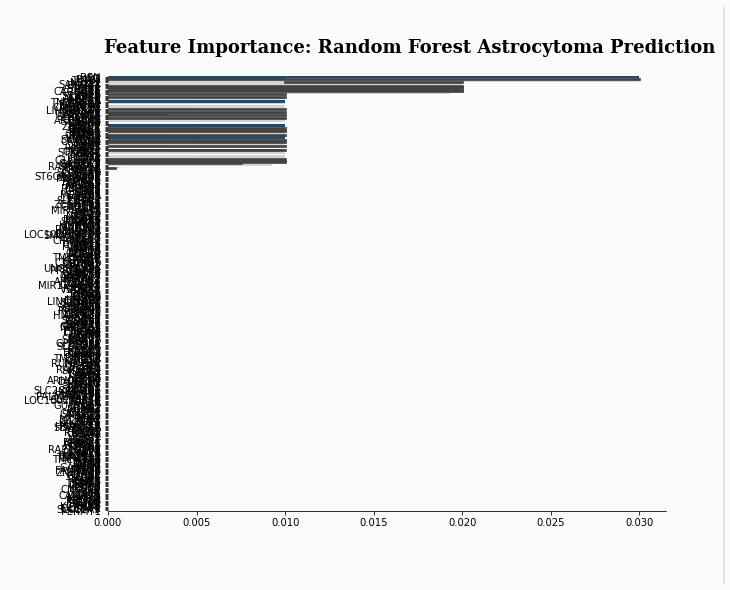

In [ ]:
background_color = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 8),facecolor=background_color)

color_map = ['lightgray' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#0f4c81' # color highlight

sns.barplot(data=fi,x='Importance',y='Feature',ax=ax,palette=color_map)
ax.set_facecolor(background_color) 
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
fig.text(0.12,0.92,"Feature Importance: Random Forest Astrocytoma Prediction", fontsize=18, fontweight='bold', fontfamily='serif')

    
plt.xlabel(" ", fontsize=12, fontweight='light', fontfamily='serif',y=-1.5)
plt.ylabel(" ", fontsize=12, fontweight='light', fontfamily='serif')


# fig.text(1.1, 0.92, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')

# fig.text(1.1, 0.315, '''
# Hmm.
# '''
#          , fontsize=14, fontweight='light', fontfamily='serif')

# ax.tick_params(axis=u'both', which=u'both',length=0)


import matplotlib.lines as lines
l1 = lines.Line2D([0.98, 0.98], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


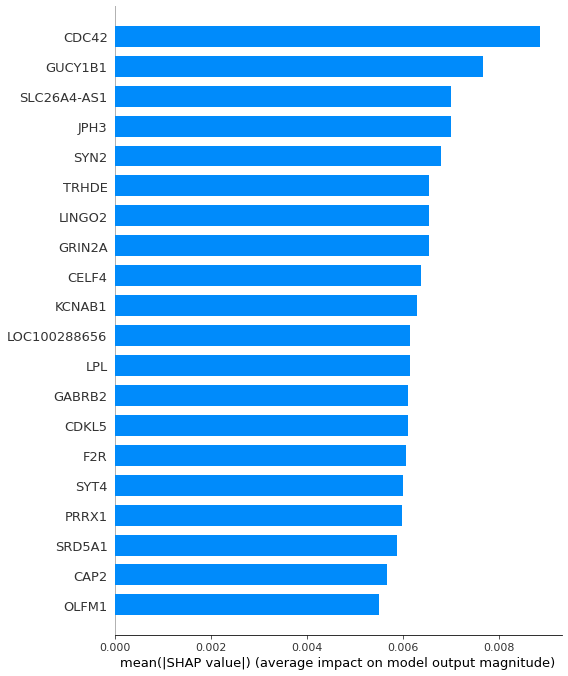

In [ ]:
import shap  

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)

# custom colour plot
colors = ["#9bb7d4", "#0f4c81"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values[1], X_test,cmap=cmap,alpha=0.4, plot_type="bar")

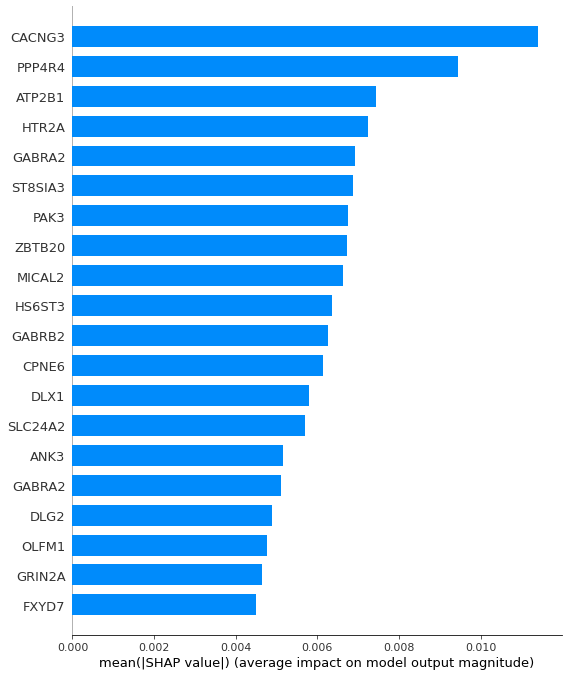